# Drift Change with Optimistic Greedy Method

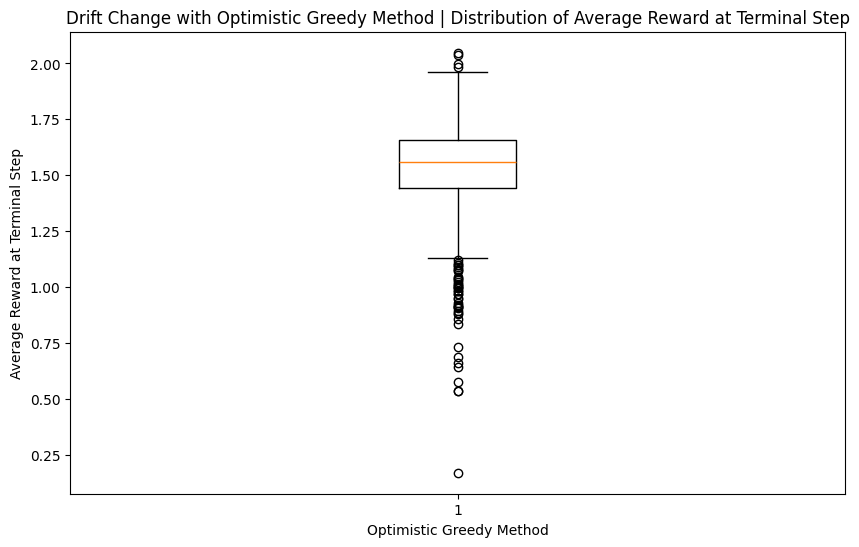

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class DriftBandit:
    def __init__(self, k, initial_means, variance=0.001):
        self.k = k
        self.initial_means = np.array(initial_means)
        self.variance = variance
        self.reset()
        
    def step(self):
        # Simulate drift in means
        self.means += np.random.normal(0, self.variance, self.k)
        return np.random.normal(self.means)
    
    def reset(self):
        self.means = np.array(self.initial_means)
        
class OptimisticGreedyAgent:
    def __init__(self, k, initial_value=5.0):
        self.k = k
        self.q_estimates = np.full(k, initial_value)
        self.action_counts = np.zeros(k)
        
    def select_action(self):
        return np.argmax(self.q_estimates)
    
    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        alpha = 1 / self.action_counts[action]
        self.q_estimates[action] += alpha * (reward - self.q_estimates[action])

def run_experiment(bandit, agent, steps=10000):
    rewards = np.zeros(steps)
    for t in range(steps):
        action = agent.select_action()
        reward = bandit.step()[action]
        agent.update_estimates(action, reward)
        rewards[t] = reward
    return rewards

# Parameters
k = 10
initial_means = np.random.normal(0, 1, k)
steps = 20000
repetitions = 1000

# Initialize arrays to store results
final_rewards = np.zeros(repetitions)

for i in range(repetitions):
    # Set different seed for each run
    np.random.seed(i)
    
    # Initialize bandit environment with drift changes
    bandit = DriftBandit(k, initial_means)
    
    # Initialize optimistic greedy agent
    agent = OptimisticGreedyAgent(k, initial_value=5.0)
    
    # Run experiment
    rewards = run_experiment(bandit, agent, steps)
    
    # Store the average reward at the terminal step
    final_rewards[i] = np.mean(rewards[-1000:])

# Plot results
plt.figure(figsize=(10, 6))
plt.boxplot(final_rewards)
plt.xlabel('Optimistic Greedy Method')
plt.ylabel('Average Reward at Terminal Step')
plt.title('Drift Change with Optimistic Greedy Method | Distribution of Average Reward at Terminal Step')
plt.show()


# Drift Change with ϵ-greedy with a fixed step size

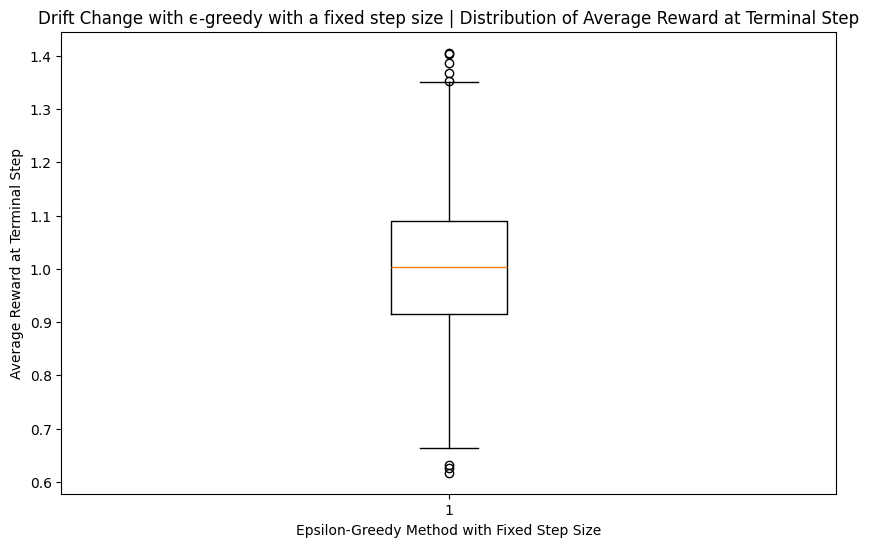

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class DriftBandit:
    def __init__(self, k, initial_means, variance=0.001):
        self.k = k
        self.initial_means = np.array(initial_means)
        self.variance = variance
        self.reset()
        
    def step(self):
        # Simulate drift in means
        self.means += np.random.normal(0, self.variance, self.k)
        return np.random.normal(self.means)
    
    def reset(self):
        self.means = np.array(self.initial_means)
        
class EpsilonGreedyAgent:
    def __init__(self, k, epsilon=0.1, step_size=0.1):
        self.k = k
        self.epsilon = epsilon
        self.step_size = step_size
        self.q_estimates = np.zeros(k)
        self.action_counts = np.zeros(k)
        
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.q_estimates)
    
    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        self.q_estimates[action] += self.step_size * (reward - self.q_estimates[action])

def run_experiment(bandit, agent, steps=10000):
    rewards = np.zeros(steps)
    for t in range(steps):
        action = agent.select_action()
        reward = bandit.step()[action]
        agent.update_estimates(action, reward)
        rewards[t] = reward
    return rewards

# Parameters
k = 10
initial_means = np.random.normal(0, 1, k)
steps = 20000
repetitions = 1000

# Initialize arrays to store results
final_rewards = np.zeros(repetitions)

for i in range(repetitions):
    # Set different seed for each run
    np.random.seed(i)
    
    # Initialize bandit environment with drift changes
    bandit = DriftBandit(k, initial_means)
    
    # Initialize epsilon-greedy agent with fixed step size
    agent = EpsilonGreedyAgent(k, epsilon=0.1, step_size=0.1)
    
    # Run experiment
    rewards = run_experiment(bandit, agent, steps)
    
    # Store the average reward at the terminal step
    final_rewards[i] = np.mean(rewards[-1000:])  # Average of last 1000 rewards

# Plot results
plt.figure(figsize=(10, 6))
plt.boxplot(final_rewards)
plt.xlabel('Epsilon-Greedy Method with Fixed Step Size')
plt.ylabel('Average Reward at Terminal Step')
plt.title('Drift Change with ϵ-greedy with a fixed step size | Distribution of Average Reward at Terminal Step')
plt.show()


# Drift Change with ϵ-greedy with a decreasing step-size (e.g., simple average estimator)

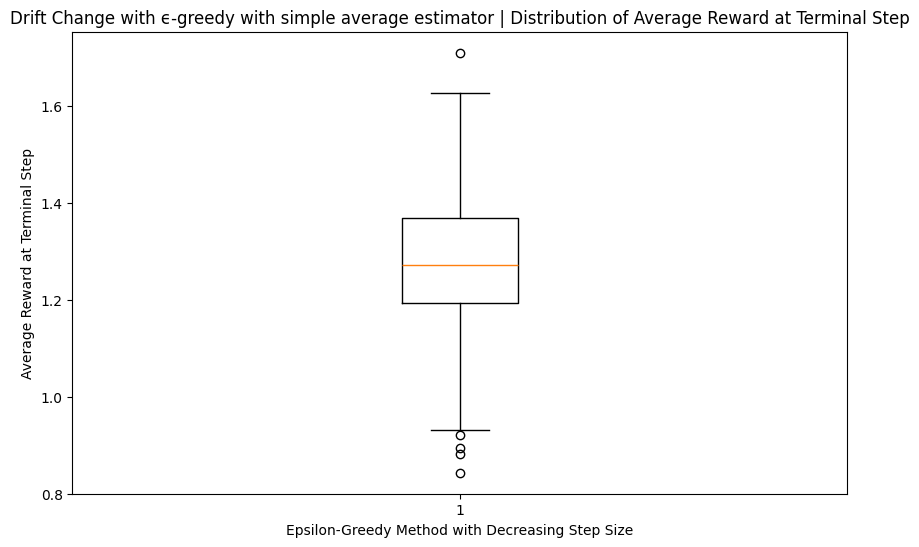

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class DriftBandit:
    def __init__(self, k, initial_means, variance=0.001):
        self.k = k
        self.initial_means = np.array(initial_means)
        self.variance = variance
        self.reset()
        
    def step(self):
        # Simulate drift in means
        self.means += np.random.normal(0, self.variance, self.k)
        return np.random.normal(self.means)
    
    def reset(self):
        self.means = np.array(self.initial_means)
        
class EpsilonGreedyDecreasingStepAgent:
    def __init__(self, k, epsilon=0.1):
        self.k = k
        self.epsilon = epsilon
        self.q_estimates = np.zeros(k)
        self.action_counts = np.zeros(k)
        
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.q_estimates)
    
    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        alpha = 1 / self.action_counts[action]  # Simple average
        self.q_estimates[action] += alpha * (reward - self.q_estimates[action])

def run_experiment(bandit, agent, steps=10000):
    rewards = np.zeros(steps)
    for t in range(steps):
        action = agent.select_action()
        reward = bandit.step()[action]
        agent.update_estimates(action, reward)
        rewards[t] = reward
    return rewards

# Parameters
k = 10
initial_means = np.random.normal(0, 1, k)
steps = 20000
repetitions = 1000

# Initialize arrays to store results
final_rewards = np.zeros(repetitions)

for i in range(repetitions):
    # Set different seed for each run
    np.random.seed(i)
    
    # Initialize bandit environment with drift changes
    bandit = DriftBandit(k, initial_means)
    
    # Initialize epsilon-greedy agent with decreasing step-size
    agent = EpsilonGreedyDecreasingStepAgent(k, epsilon=0.1)
    
    # Run experiment
    rewards = run_experiment(bandit, agent, steps)
    
    # Store the average reward at the terminal step
    final_rewards[i] = np.mean(rewards[-1000:])  # Average of last 1000 rewards

# Plot results
plt.figure(figsize=(10, 6))
plt.boxplot(final_rewards)
plt.xlabel('Epsilon-Greedy Method with Decreasing Step Size')
plt.ylabel('Average Reward at Terminal Step')
plt.title('Drift Change with ϵ-greedy with simple average estimator | Distribution of Average Reward at Terminal Step')
plt.show()


# Optimistic Greedy Method with mean-reverting change

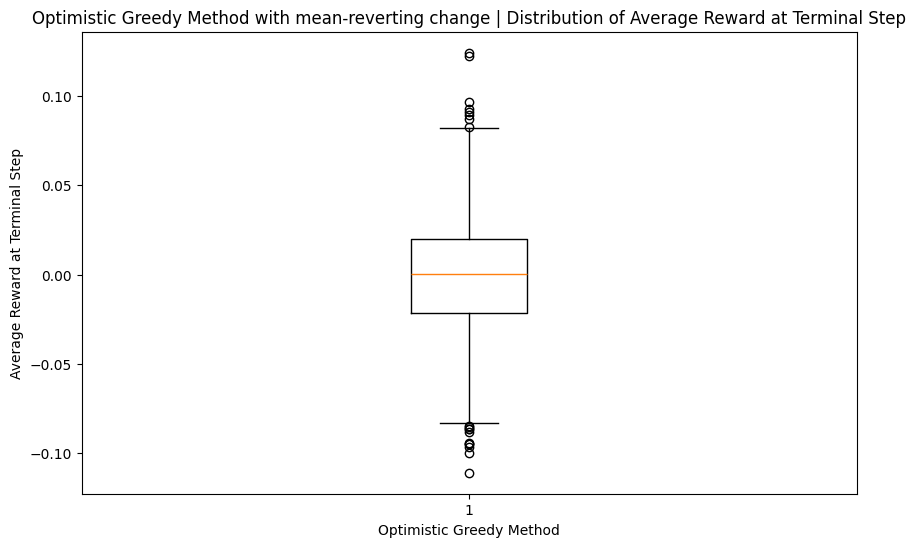

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class MeanRevertingBandit:
    def __init__(self, k, initial_means, kappa=0.5, variance=0.01):
        self.k = k
        self.initial_means = np.array(initial_means)
        self.kappa = kappa
        self.variance = variance
        self.reset()
        
    def step(self):
        # Simulate mean-reverting changes in means
        self.means = self.kappa * self.means + np.random.normal(0, self.variance, self.k)
        return np.random.normal(self.means)
    
    def reset(self):
        self.means = np.array(self.initial_means)
        
class OptimisticGreedyAgent:
    def __init__(self, k, initial_value=5.0):
        self.k = k
        self.q_estimates = np.full(k, initial_value)
        self.action_counts = np.zeros(k)
        
    def select_action(self):
        return np.argmax(self.q_estimates)
    
    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        alpha = 1 / self.action_counts[action]
        self.q_estimates[action] += alpha * (reward - self.q_estimates[action])

def run_experiment(bandit, agent, steps=10000):
    rewards = np.zeros(steps)
    for t in range(steps):
        action = agent.select_action()
        reward = bandit.step()[action]
        agent.update_estimates(action, reward)
        rewards[t] = reward
    return rewards

# Parameters
k = 10
initial_means = np.random.normal(0, 1, k)
steps = 20000
repetitions = 1000

# Initialize arrays to store results
final_rewards = np.zeros(repetitions)

for i in range(repetitions):
    # Set different seed for each run
    np.random.seed(i)
    
    # Initialize bandit environment with mean-reverting changes
    bandit = MeanRevertingBandit(k, initial_means)
    
    # Initialize optimistic greedy agent
    agent = OptimisticGreedyAgent(k, initial_value=5.0)
    
    # Run experiment
    rewards = run_experiment(bandit, agent, steps)
    
    # Store the average reward at the terminal step
    final_rewards[i] = np.mean(rewards[-1000:])  # Average of last 1000 rewards

# Plot results
plt.figure(figsize=(10, 6))
plt.boxplot(final_rewards)
plt.xlabel('Optimistic Greedy Method')
plt.ylabel('Average Reward at Terminal Step')
plt.title('Optimistic Greedy Method with mean-reverting change | Distribution of Average Reward at Terminal Step')
plt.show()


# epsilon-greedy with fixed step size model with mean-reverting change

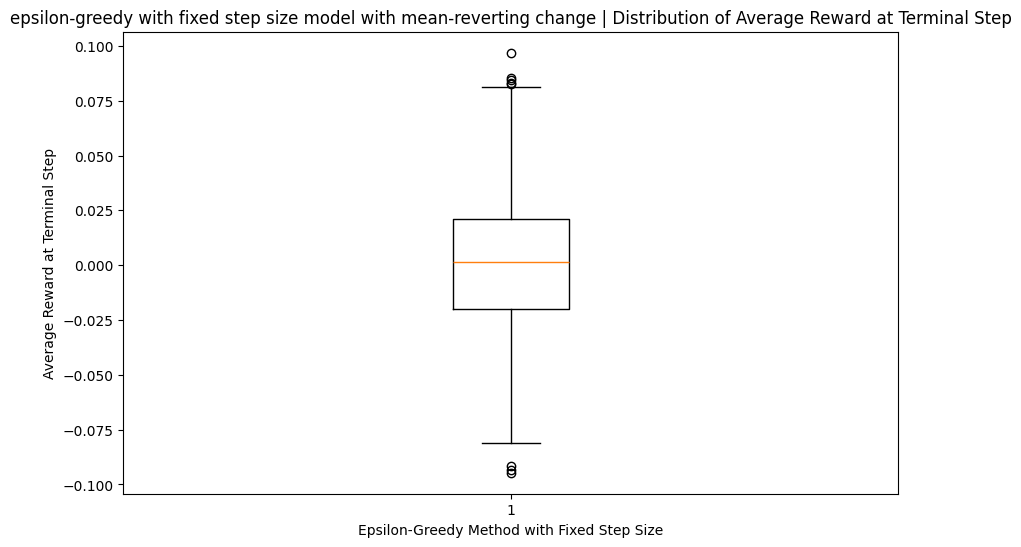

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class MeanRevertingBandit:
    def __init__(self, k, initial_means, kappa=0.5, variance=0.01):
        self.k = k
        self.initial_means = np.array(initial_means)
        self.kappa = kappa
        self.variance = variance
        self.reset()
        
    def step(self):
        # Simulate mean-reverting changes in means
        self.means = self.kappa * self.means + np.random.normal(0, self.variance, self.k)
        return np.random.normal(self.means)
    
    def reset(self):
        self.means = np.array(self.initial_means)
        
class EpsilonGreedyFixedStepAgent:
    def __init__(self, k, epsilon=0.1, step_size=0.1):
        self.k = k
        self.epsilon = epsilon
        self.step_size = step_size
        self.q_estimates = np.zeros(k)
        self.action_counts = np.zeros(k)
        
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.q_estimates)
    
    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        self.q_estimates[action] += self.step_size * (reward - self.q_estimates[action])

def run_experiment(bandit, agent, steps=10000):
    rewards = np.zeros(steps)
    for t in range(steps):
        action = agent.select_action()
        reward = bandit.step()[action]
        agent.update_estimates(action, reward)
        rewards[t] = reward
    return rewards

# Parameters
k = 10
initial_means = np.random.normal(0, 1, k)
steps = 20000
repetitions = 1000

# Initialize arrays to store results
final_rewards = np.zeros(repetitions)

for i in range(repetitions):
    # Set different seed for each run
    np.random.seed(i)
    
    # Initialize bandit environment with mean-reverting changes
    bandit = MeanRevertingBandit(k, initial_means)
    
    # Initialize epsilon-greedy agent with fixed step size
    agent = EpsilonGreedyFixedStepAgent(k, epsilon=0.1, step_size=0.1)
    
    # Run experiment
    rewards = run_experiment(bandit, agent, steps)
    
    # Store the average reward at the terminal step
    final_rewards[i] = np.mean(rewards[-1000:])  # Average of last 1000 rewards

# Plot results
plt.figure(figsize=(10, 6))
plt.boxplot(final_rewards)
plt.xlabel('Epsilon-Greedy Method with Fixed Step Size')
plt.ylabel('Average Reward at Terminal Step')
plt.title('epsilon-greedy with fixed step size model with mean-reverting change | Distribution of Average Reward at Terminal Step')
plt.show()


# Epsilon greedy with decreasing step size and mean-reverting change

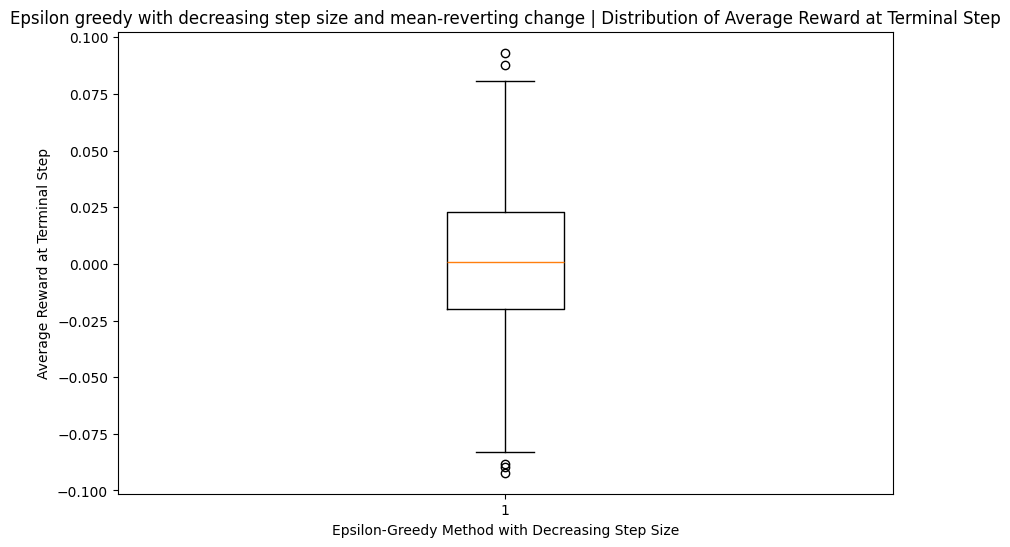

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class MeanRevertingBandit:
    def __init__(self, k, initial_means, kappa=0.5, variance=0.01):
        self.k = k
        self.initial_means = np.array(initial_means)
        self.kappa = kappa
        self.variance = variance
        self.reset()
        
    def step(self):
        # Simulate mean-reverting changes in means
        self.means = self.kappa * self.means + np.random.normal(0, self.variance, self.k)
        return np.random.normal(self.means)
    
    def reset(self):
        self.means = np.array(self.initial_means)
        
class EpsilonGreedyDecreasingStepAgent:
    def __init__(self, k, epsilon=0.1):
        self.k = k
        self.epsilon = epsilon
        self.q_estimates = np.zeros(k)
        self.action_counts = np.zeros(k)
        
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.q_estimates)
    
    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        alpha = 1 / self.action_counts[action]  # Simple average
        self.q_estimates[action] += alpha * (reward - self.q_estimates[action])

def run_experiment(bandit, agent, steps=10000):
    rewards = np.zeros(steps)
    for t in range(steps):
        action = agent.select_action()
        reward = bandit.step()[action]
        agent.update_estimates(action, reward)
        rewards[t] = reward
    return rewards

# Parameters
k = 10
initial_means = np.random.normal(0, 1, k)
steps = 20000
repetitions = 1000

# Initialize arrays to store results
final_rewards = np.zeros(repetitions)

for i in range(repetitions):
    # Set different seed for each run
    np.random.seed(i)
    
    # Initialize bandit environment with mean-reverting changes
    bandit = MeanRevertingBandit(k, initial_means)
    
    # Initialize epsilon-greedy agent with decreasing step size
    agent = EpsilonGreedyDecreasingStepAgent(k, epsilon=0.1)
    
    # Run experiment
    rewards = run_experiment(bandit, agent, steps)
    
    # Store the average reward at the terminal step
    final_rewards[i] = np.mean(rewards[-1000:])  # Average of last 1000 rewards

# Plot results
plt.figure(figsize=(10, 6))
plt.boxplot(final_rewards)
plt.xlabel('Epsilon-Greedy Method with Decreasing Step Size')
plt.ylabel('Average Reward at Terminal Step')
plt.title('Epsilon greedy with decreasing step size and mean-reverting change | Distribution of Average Reward at Terminal Step')
plt.show()


# Abrupt Changes and Optimistic Greedy Method

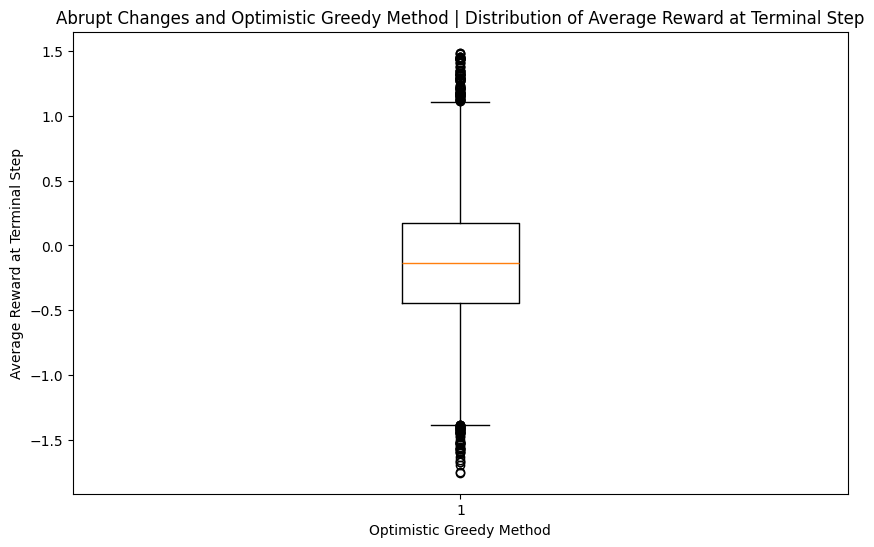

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class AbruptChangeBandit:
    def __init__(self, k, initial_means, change_prob=0.005):
        self.k = k
        self.initial_means = np.array(initial_means)
        self.change_prob = change_prob
        self.reset()
        
    def step(self):
        # With a small probability, permute the means
        if np.random.rand() < self.change_prob:
            np.random.shuffle(self.means)
        return np.random.normal(self.means)
    
    def reset(self):
        self.means = np.array(self.initial_means)
        
class OptimisticGreedyAgent:
    def __init__(self, k, initial_value=5.0):
        self.k = k
        self.q_estimates = np.full(k, initial_value)
        self.action_counts = np.zeros(k)
        
    def select_action(self):
        return np.argmax(self.q_estimates)
    
    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        alpha = 1 / self.action_counts[action]
        self.q_estimates[action] += alpha * (reward - self.q_estimates[action])

def run_experiment(bandit, agent, steps=10000):
    rewards = np.zeros(steps)
    for t in range(steps):
        action = agent.select_action()
        reward = bandit.step()[action]
        agent.update_estimates(action, reward)
        rewards[t] = reward
    return rewards

# Parameters
k = 10
initial_means = np.random.normal(0, 1, k)
steps = 20000
repetitions = 10000

# Initialize arrays to store results
final_rewards = np.zeros(repetitions)

for i in range(repetitions):
    # Set different seed for each run
    np.random.seed(i)
    
    # Initialize bandit environment with abrupt changes
    bandit = AbruptChangeBandit(k, initial_means)
    
    # Initialize optimistic greedy agent
    agent = OptimisticGreedyAgent(k, initial_value=5.0)
    
    # Run experiment
    rewards = run_experiment(bandit, agent, steps)
    
    # Store the average reward at the terminal step
    final_rewards[i] = np.mean(rewards[-1000:])  # Average of last 1000 rewards

# Plot results
plt.figure(figsize=(10, 6))
plt.boxplot(final_rewards)
plt.xlabel('Optimistic Greedy Method')
plt.ylabel('Average Reward at Terminal Step')
plt.title('Abrupt Changes and Optimistic Greedy Method | Distribution of Average Reward at Terminal Step')
plt.show()


# Abrupt Changes and 𝜖-Greedy with Fixed Step Size

c:\Users\Sameer\anaconda3\envs\not_base_v3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 120598 (\N{MATHEMATICAL ITALIC EPSILON SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


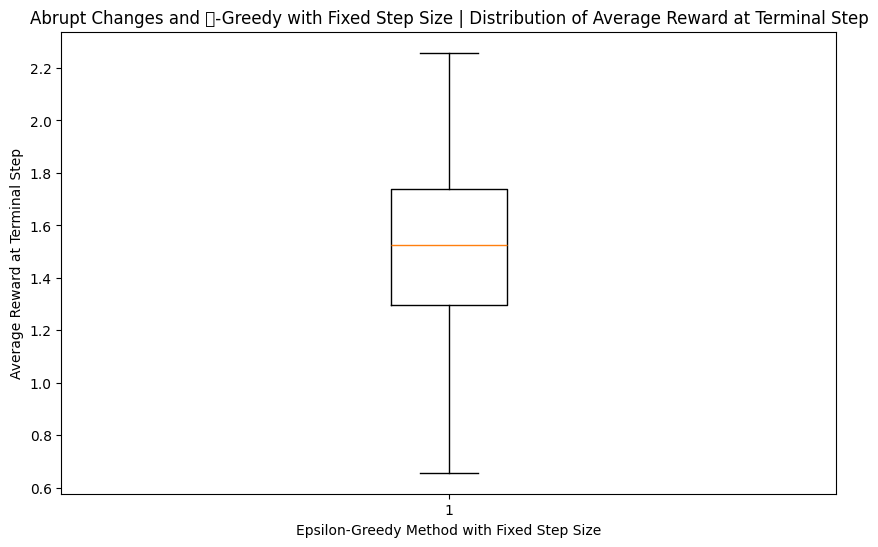

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class AbruptChangeBandit:
    def __init__(self, k, initial_means, change_prob=0.005):
        self.k = k
        self.initial_means = np.array(initial_means)
        self.change_prob = change_prob
        self.reset()
        
    def step(self):
        # With a small probability, permute the means
        if np.random.rand() < self.change_prob:
            np.random.shuffle(self.means)
        return np.random.normal(self.means)
    
    def reset(self):
        self.means = np.array(self.initial_means)
        
class EpsilonGreedyFixedStepAgent:
    def __init__(self, k, epsilon=0.1, step_size=0.1):
        self.k = k
        self.epsilon = epsilon
        self.step_size = step_size
        self.q_estimates = np.zeros(k)
        self.action_counts = np.zeros(k)
        
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.q_estimates)
    
    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        self.q_estimates[action] += self.step_size * (reward - self.q_estimates[action])

def run_experiment(bandit, agent, steps=10000):
    rewards = np.zeros(steps)
    for t in range(steps):
        action = agent.select_action()
        reward = bandit.step()[action]
        agent.update_estimates(action, reward)
        rewards[t] = reward
    return rewards

# Parameters
k = 10
initial_means = np.random.normal(0, 1, k)
steps = 20000
repetitions = 1000

# Initialize arrays to store results
final_rewards = np.zeros(repetitions)

for i in range(repetitions):
    # Set different seed for each run
    np.random.seed(i)
    
    # Initialize bandit environment with abrupt changes
    bandit = AbruptChangeBandit(k, initial_means)
    
    # Initialize epsilon-greedy agent with fixed step size
    agent = EpsilonGreedyFixedStepAgent(k, epsilon=0.1, step_size=0.1)
    
    # Run experiment
    rewards = run_experiment(bandit, agent, steps)
    
    # Store the average reward at the terminal step
    final_rewards[i] = np.mean(rewards[-1000:])  # Average of last 1000 rewards

# Plot results
plt.figure(figsize=(10, 6))
plt.boxplot(final_rewards)
plt.xlabel('Epsilon-Greedy Method with Fixed Step Size')
plt.ylabel('Average Reward at Terminal Step')
plt.title('Abrupt Changes and 𝜖-Greedy with Fixed Step Size | Distribution of Average Reward at Terminal Step')
plt.show()


# Abrupt Changes and ϵ-Greedy with Decreasing Step Size

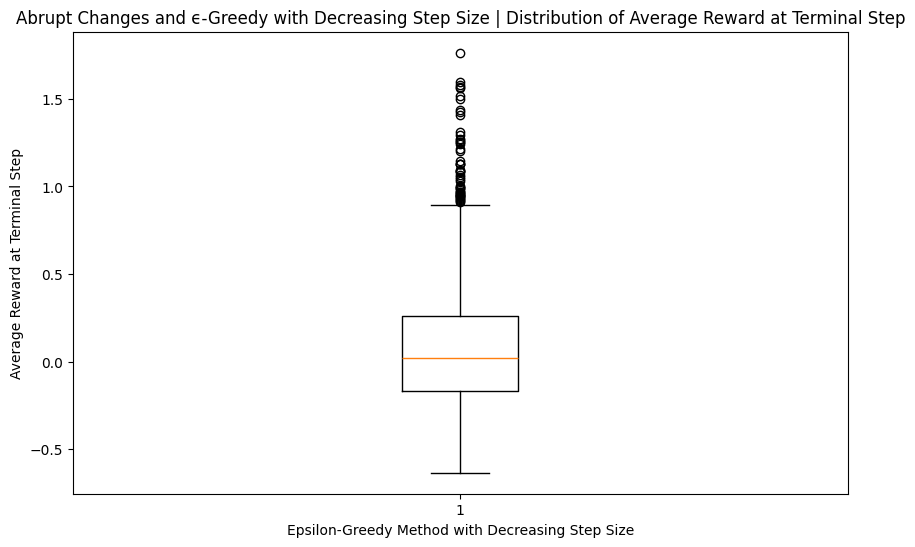

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class AbruptChangeBandit:
    def __init__(self, k, initial_means, change_prob=0.005):
        self.k = k
        self.initial_means = np.array(initial_means)
        self.change_prob = change_prob
        self.reset()
        
    def step(self):
        # With a small probability, permute the means
        if np.random.rand() < self.change_prob:
            np.random.shuffle(self.means)
        return np.random.normal(self.means)
    
    def reset(self):
        self.means = np.array(self.initial_means)
        
class EpsilonGreedyDecreasingStepAgent:
    def __init__(self, k, epsilon=0.1):
        self.k = k
        self.epsilon = epsilon
        self.q_estimates = np.zeros(k)
        self.action_counts = np.zeros(k)
        
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.q_estimates)
    
    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        alpha = 1 / self.action_counts[action]  # Simple average
        self.q_estimates[action] += alpha * (reward - self.q_estimates[action])

def run_experiment(bandit, agent, steps=10000):
    rewards = np.zeros(steps)
    for t in range(steps):
        action = agent.select_action()
        reward = bandit.step()[action]
        agent.update_estimates(action, reward)
        rewards[t] = reward
    return rewards

# Parameters
k = 10
initial_means = np.random.normal(0, 1, k)
steps = 20000
repetitions = 1000

# Initialize arrays to store results
final_rewards = np.zeros(repetitions)

for i in range(repetitions):
    # Set different seed for each run
    np.random.seed(i)
    
    # Initialize bandit environment with abrupt changes
    bandit = AbruptChangeBandit(k, initial_means)
    
    # Initialize epsilon-greedy agent with decreasing step size
    agent = EpsilonGreedyDecreasingStepAgent(k, epsilon=0.1)
    
    # Run experiment
    rewards = run_experiment(bandit, agent, steps)
    
    # Store the average reward at the terminal step
    final_rewards[i] = np.mean(rewards[-1000:])  # Average of last 1000 rewards

# Plot results
plt.figure(figsize=(10, 6))
plt.boxplot(final_rewards)
plt.xlabel('Epsilon-Greedy Method with Decreasing Step Size')
plt.ylabel('Average Reward at Terminal Step')
plt.title('Abrupt Changes and ϵ-Greedy with Decreasing Step Size | Distribution of Average Reward at Terminal Step')
plt.show()
